# Analysis procedure for triglycerides Analysis

## Reading data files and filtering

In [13]:
using CSV, DataFrames, Dates
datadir = "/xdisk/jzhou/mig2020/rsgrps/jzhou/UKB_48152/pheno/"; # the location where the data files from vGWAS/datasets/UKBclean of Box are stored 

Start with EUR data: 337,138 subjects.

In [14]:
phenotype_info = CSV.read(datadir * "/EUR_detail.txt", DataFrame)
#data_center = CSV.read(datadir * "/assessment_center.csv", DataFrame)
#phenotype_info = leftjoin(phenotype_info, data_center, on=[:FID=>:FID], makeunique=true)
phenotype_info = rename(phenotype_info,  Symbol("f.eid") => :FID)
phenotype_info = select(phenotype_info, :FID, :DOB, :SEX, :BMI, :dm, :age_2010, :date_init,
    :date_first_dm, :date_firstoc_t2d, :date_firstoc_t1d, :age_init, :insulin, :self_insulin, :antidiabetics,  
    :self_cholesteroldrugs, Between(:PC1, :PC10))

,FID,DOB,SEX,BMI,dm,age_2010,date_init,date_first_dm
,Int64,Date,String,Float64?,Int64,Int64,Date,Date?
1,1000012,1965-04-01,Male,28.6,0,44,2008-04-01,missing
2,1000031,1957-06-01,Female,25.0,0,52,2010-04-20,missing
3,1000047,1963-04-01,Male,36.8,0,46,2008-02-01,missing
4,1000073,1956-02-01,Male,44.6,0,53,2009-07-20,missing
5,1000085,1944-06-01,Male,26.8,0,65,2008-10-24,missing
6,1000094,1947-08-01,Female,23.6,0,62,2008-07-10,missing
7,1000101,1944-12-01,Male,30.0,0,65,2008-07-15,missing
8,1000119,1964-06-01,Male,30.7,0,45,2009-04-21,missing
9,1000122,1955-04-01,Female,26.1,0,54,2010-05-14,missing


## Filtering out samples with missing covariates

Filtering out subjects with missing covariates we need: `SEX`, `age_2010`, `PC1`, `BMI` 

Sex. No missing there. 

[TODO] UK Biobank uses 0 for females and 1 for males ([source](https://biobank.ctsu.ox.ac.uk/crystal/coding.cgi?id=9)), but we have 1's and 2's here. Which is for which?

In [15]:
using StatsBase

Age at year 2010. This is later used for age at measurement (age_2010 + year_of_measurement - 2010). No missing again. 

In [16]:
count(isnan.(phenotype_info.age_2010))

0

PC1. no missing again. 

In [17]:
count(isnan.(phenotype_info.PC1))

0

BMI. Some missing exists. Filtered out 337,138 - 336,118 = 1,020 samples. 

In [18]:
#phenotype_info.BMI = map(x -> x == "NA" ? missing : parse(Float64, x), phenotype_info.BMI)
phenotype_info = filter(x -> x.BMI !== missing, phenotype_info)

,FID,DOB,SEX,BMI,dm,age_2010,date_init,date_first_dm
,Int64,Date,String,Float64?,Int64,Int64,Date,Date?
1,1000012,1965-04-01,Male,28.6,0,44,2008-04-01,missing
2,1000031,1957-06-01,Female,25.0,0,52,2010-04-20,missing
3,1000047,1963-04-01,Male,36.8,0,46,2008-02-01,missing
4,1000073,1956-02-01,Male,44.6,0,53,2009-07-20,missing
5,1000085,1944-06-01,Male,26.8,0,65,2008-10-24,missing
6,1000094,1947-08-01,Female,23.6,0,62,2008-07-10,missing
7,1000101,1944-12-01,Male,30.0,0,65,2008-07-15,missing
8,1000119,1964-06-01,Male,30.7,0,45,2009-04-21,missing
9,1000122,1955-04-01,Female,26.1,0,54,2010-05-14,missing


Indicator for triglycerides medication. Some missing exists. Filtered out 336,118 - 334,320 = 1,798 samples.

## Read in triglycerides data

In [19]:
triglycerides_info = CSV.read(datadir * "/pc_biomarkers/triglycerides.txt", DataFrame)
triglycerides_info = rename(triglycerides_info,  Symbol("eid") => :FID)
sort!(triglycerides_info, [:FID, :event_dt])

,FID,triglyc,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,Date?,Int64,String,String,String
1,1000050,0.6,2014-11-28,3,XE2q9,read3,Serum triglyceride levels
2,1000068,1.66,2004-07-30,3,XE2q9,read3,Serum triglyceride levels
3,1000068,2.6,2005-08-22,3,XE2q9,read3,Serum triglyceride levels
4,1000068,1.39,2008-10-06,3,XE2q9,read3,Serum triglyceride levels
5,1000068,1.52,2009-02-09,3,XE2q9,read3,Serum triglyceride levels
6,1000068,1.32,2011-08-02,3,XE2q9,read3,Serum triglyceride levels
7,1000068,1.83,2012-08-17,3,XE2q9,read3,Serum triglyceride levels
8,1000068,2.21,2013-08-09,3,XE2q9,read3,Serum triglyceride levels
9,1000068,1.8,2014-06-10,3,XE2q9,read3,Serum triglyceride levels


Number of subjects with triglycerides data: 

In [20]:
length(unique(triglycerides_info[!, :FID]))

183810

## Join triglycerides data with phenotypes

Inner join triglycerides_info and phenotype_info.

In [21]:
@time triglycerides_info_joined = innerjoin(triglycerides_info, phenotype_info, on=[:FID=>:FID], makeunique=true)

  0.377486 seconds (775 allocations: 357.052 MiB)


,FID,triglyc,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,Date?,Int64,String,String,String
1,1000094,0.9,2008-07-18,3,XE2q9,read3,Serum triglyceride levels
2,1000094,1.3,2008-12-10,3,XE2q9,read3,Serum triglyceride levels
3,1000094,1.03,2009-09-16,3,XE2q9,read3,Serum triglyceride levels
4,1000094,1.02,2010-06-29,3,XE2q9,read3,Serum triglyceride levels
5,1000094,0.84,2011-03-25,3,XE2q9,read3,Serum triglyceride levels
6,1000094,1.64,2011-12-14,3,XE2q9,read3,Serum triglyceride levels
7,1000094,1.83,2012-09-19,3,XE2q9,read3,Serum triglyceride levels
8,1000094,1.34,2013-06-19,3,XE2q9,read3,Serum triglyceride levels
9,1000094,1.07,2014-02-19,3,XE2q9,read3,Serum triglyceride levels


Number of subjects:

In [22]:
length(unique(triglycerides_info_joined.FID))

124767

## Cleaning measurement dates and age at measurements

In [23]:
triglycerides_info_joined = filter(x -> x.event_dt !== missing, triglycerides_info_joined)

,FID,triglyc,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,Date?,Int64,String,String,String
1,1000094,0.9,2008-07-18,3,XE2q9,read3,Serum triglyceride levels
2,1000094,1.3,2008-12-10,3,XE2q9,read3,Serum triglyceride levels
3,1000094,1.03,2009-09-16,3,XE2q9,read3,Serum triglyceride levels
4,1000094,1.02,2010-06-29,3,XE2q9,read3,Serum triglyceride levels
5,1000094,0.84,2011-03-25,3,XE2q9,read3,Serum triglyceride levels
6,1000094,1.64,2011-12-14,3,XE2q9,read3,Serum triglyceride levels
7,1000094,1.83,2012-09-19,3,XE2q9,read3,Serum triglyceride levels
8,1000094,1.34,2013-06-19,3,XE2q9,read3,Serum triglyceride levels
9,1000094,1.07,2014-02-19,3,XE2q9,read3,Serum triglyceride levels


In [24]:
length(unique(triglycerides_info_joined.FID))

124767

Obtain year of measurement and age at measurement:

In [25]:
triglycerides_info_joined.year_of_measurement = map(x ->  Dates.year(x.event_dt), eachrow(triglycerides_info_joined))

696863-element Array{Int64,1}:
 2008
 2008
 2009
 2010
 2011
 2011
 2012
 2013
 2014
 2016
 2010
 2011
 2013
    ⋮
 2012
 2013
 2014
 2015
 2013
 2016
 2003
 2005
 2008
 2010
 2011
 2012

In [26]:
triglycerides_info_joined.age_at_measurement = map(x -> x.age_2010 + x.year_of_measurement - 2010, eachrow(triglycerides_info_joined));

Special meaning for year 1901 1902, and 1903, 2037

https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?tk=68EMKkCB8skqob929k0lJTa0eLbPoYnY157881&id=819


| Date | Meaning |
|:---|:---|
| 1900-01-01 |	Code has no event date |
| 1901-01-01 |	Code has event date before participant's date of birth |
| 1902-02-02 |	Code has event date matching participant's date of birth |
| 1903-03-03 |	Code has event date after participant's date of birth and falls in the same calendar year as date of birth |
| 2037-07-07 |	Code has event date in the future and is presumed to be a place-holder or other system default |

We remove them. 

In [27]:
minimum(triglycerides_info_joined.age_at_measurement)

-62

In [28]:
maximum(triglycerides_info_joined.age_at_measurement)

98

In [29]:
yom_map = countmap(triglycerides_info_joined.year_of_measurement);
for v in sort(yom_map)
    println(v)
end

1902 => 8
1903 => 1
1970 => 1
1974 => 1
1980 => 1
1982 => 3
1983 => 4
1984 => 3
1985 => 6
1986 => 8
1987 => 3
1988 => 36
1989 => 66
1990 => 153
1991 => 275
1992 => 464
1993 => 595
1994 => 577
1995 => 733
1996 => 1013
1997 => 1517
1998 => 2207
1999 => 2938
2000 => 4685
2001 => 7664
2002 => 12316
2003 => 18732
2004 => 27795
2005 => 32892
2006 => 40143
2007 => 44247
2008 => 48076
2009 => 51819
2010 => 53158
2011 => 55217
2012 => 58944
2013 => 62738
2014 => 60350
2015 => 60753
2016 => 38016
2017 => 8703
2037 => 2


In [30]:
triglycerides_info_joined = filter(x -> 1940 <= x.year_of_measurement <= 2017, triglycerides_info_joined)

,FID,triglyc,event_dt,data_provider,code,terminology,term_description
,Int64,Float64,Date?,Int64,String,String,String
1,1000094,0.9,2008-07-18,3,XE2q9,read3,Serum triglyceride levels
2,1000094,1.3,2008-12-10,3,XE2q9,read3,Serum triglyceride levels
3,1000094,1.03,2009-09-16,3,XE2q9,read3,Serum triglyceride levels
4,1000094,1.02,2010-06-29,3,XE2q9,read3,Serum triglyceride levels
5,1000094,0.84,2011-03-25,3,XE2q9,read3,Serum triglyceride levels
6,1000094,1.64,2011-12-14,3,XE2q9,read3,Serum triglyceride levels
7,1000094,1.83,2012-09-19,3,XE2q9,read3,Serum triglyceride levels
8,1000094,1.34,2013-06-19,3,XE2q9,read3,Serum triglyceride levels
9,1000094,1.07,2014-02-19,3,XE2q9,read3,Serum triglyceride levels


In [31]:
length(unique(triglycerides_info_joined.FID))

124767

In [32]:
minimum(triglycerides_info_joined.age_at_measurement)

8

In [33]:
maximum(triglycerides_info_joined.age_at_measurement)

79

## Shifting

In [34]:
#bp_info_joined[!, :sbp_shifted] = map(x -> x.self_bpdrugs == 1 ? x.Systolic_bp_pc + 15.0 :
#                               x.Systolic_bp_pc, eachrow(bp_info_joined))
#bp_info_joined[!, :dbp_shifted] = map(x -> x.self_bpdrugs == 1 ? x.Diastolic_bp_pc + 10.0 :
#                               x.Diastolic_bp_pc, eachrow(bp_info_joined));

## Standardization

We compute standardized age, bmi, etc. before splitting diabetic and nondiabetic samples.  

In [35]:
using Statistics
standardizes(x) = (x .- mean(skipmissing(x))) ./ std(skipmissing(x))
triglycerides_info_joined[!, :std_age] = standardizes(triglycerides_info_joined[!, :age_at_measurement])
triglycerides_info_joined[!, :std_age_sq] = map(x -> x.std_age ^ 2, eachrow(triglycerides_info_joined))
triglycerides_info_joined[!, :std_bmi] = standardizes(triglycerides_info_joined[!, :BMI])
triglycerides_info_joined[!, :std_triglycerides] = standardizes(triglycerides_info_joined[!, :triglyc])

696852-element Array{Float64,1}:
 -0.6905224573158701
 -0.30585005827927825
 -0.5655039276289778
 -0.5751207376048926
 -0.748223317171359
  0.02112148090182475
  0.20384087044420607
 -0.267382818375619
 -0.5270366877253185
 -0.2866164383274486
  0.07882234075731358
  0.36732664003475757
 -0.4501022079180003
  ⋮
 -0.9020922767859957
 -1.084811666328377
 -0.5943543575567222
 -0.8828586568341662
 -0.4501022079180003
 -0.2769996283515338
 -0.5943543575567222
 -0.49818625779757414
  0.6558309393122013
  0.07882234075731358
 -0.8828586568341662
 -0.20968195852013038

In [36]:
d = countmap(triglycerides_info_joined.FID)
n_measurements = []
for (k, v) in d
    push!(n_measurements, v)
end

In [37]:
using Statistics

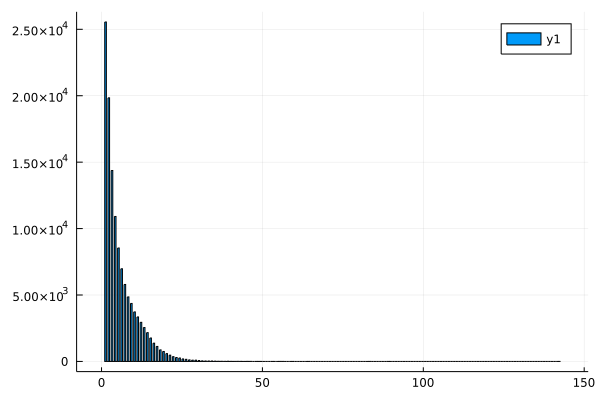

In [38]:
using Plots
histogram(n_measurements)

In [39]:
CSV.write("triglycerides_all.csv", triglycerides_info_joined)

"triglycerides_all.csv"

## Fitting the null model

Content of null_fitter_dbp_diabetes.jl: 

```julia
using DataFrames, CSV
using Statistics
using vGWAS
using Ipopt, WiSER
using LinearAlgebra
using KNITRO
using BGEN
# fit the null model
BLAS.set_num_threads(1)
solver = KNITRO.KnitroSolver(outlev=3) # outlev 0-6

genetic_iids_subsample = CSV.read("diabetes_subjects_bp.txt", DataFrame; header=false)[!, 1]


bp_data = CSV.read("bp_diabetics.csv", DataFrame)
genetic_iids_subsample = unique(bp_data.FID)
@time nm = vgwas(@formula(std_dbp ~ 1 + SEX + std_age + std_age_sq +
        PC1 + PC2 + PC3 + PC4 + PC5 + std_bmi),
    @formula(std_dbp ~ 1 + std_age),
    @formula(std_dbp ~ 1 + SEX + std_age + std_age_sq +
        PC1 + PC2 + PC3 + PC4 + PC5 +
        std_bmi),
    :IID,
    bp_data,
    nothing;
    nullfile="dbp.test.diabetics.null.txt",
    solver=solver,
    runs=10
)

println(nm)
using Serialization
open("fittednullmodel.dbp.test.diabetics.jls", "w") do io
    Serialization.serialize(io, nm)
end
```
- change `std_dbp` to `std_sbp` for analyzing sbp
- change `diabetes` or `diabetics` to `nondiabetics` or `nondiabetes` for analyzing non-diabetes participants
- Knitro is a commercial library installed on Hua's desktop. We decided to fit the null model only on Hua's machine, and when Aubrey needs to fit a null model, the data or the fitted null models will be shared through Box. 

## Running vGWAS on a cluster

The julia script for actual score test (scoretest_bp.jl) for a piece of BGEN file:

```julia
using DataFrames, CSV
using Statistics
using vGWAS
using WiSER
using LinearAlgebra
using BGEN
# fit the null model
BLAS.set_num_threads(1)


using Serialization

bgendir = ARGS[1] # ../ukb_imputed
chr = ARGS[2] # 1 to 22
fitted_null = ARGS[3] # "fittednullmodel.sbp.test.diabetics.jls"
pvalfile = ARGS[4] # "sbp.test.diabetics.chr$(chr).txt"
chunkidx = parse(Int, ARGS[5])
nchunks  = parse(Int, ARGS[6])

nm = open(deserialize, fitted_null)
genetic_iids_subsample = nm.ids

bgenfilename = bgendir * "/ukb_imp_chr$(chr)_v3"
samplefilename = bgendir * "/ukb48152_imp_chr$(chr)_v3_s487317.sample"
mfifilename = bgendir * "/ukb_mfi_chr$(chr)_v3.txt"
ukb_data = Bgen(bgenfilename * ".bgen"; sample_path = samplefilename)
genetic_iids = map(x -> parse(Int, split(x, " ")[1]), samples(ukb_data))

order_dict = Dict{Int, Int}()
for (i, iid) in enumerate(genetic_iids)
    order_dict[iid] = i
end

# sort!(bp_data, order(:IID, by=x -> order_dict[x]))

sample_indicator = falses(length(genetic_iids))
for v in genetic_iids_subsample
    sample_indicator[order_dict[v]] = true
end

# GWAS for each chromosome


min_maf = 0.002
min_info_score = 0.3
min_hwe_pval = 1e-10


mfi = CSV.read(mfifilename, DataFrame; header=false)
mfi.Column8 = map(x -> x == "NA" ? NaN : parse(Float64, x), mfi.Column8) # Column8: info score
snpmask = (mfi.Column6 .> min_maf) .& (mfi.Column8 .> 0.3) # Column6: MAF

chunksize = n_variants(ukb_data) ÷ nchunks + (n_variants(ukb_data) % nchunks > 0 ? 1 : 0)
startidx = chunksize * (chunkidx - 1) + 1
endidx = min(chunksize * chunkidx, n_variants(ukb_data))
snpmask = snpmask[startidx:endidx]

println("running for variants $startidx to $endidx")

# rearrange data in nm so that it matches bgen data
nullinds = indexin(genetic_iids[sample_indicator], nm.ids)
nm.obswts .= isempty(nm.obswts) ? nm.obswts : nm.obswts[nullinds]
nm.ids .= nm.ids[nullinds]
nm.nis .= nm.nis[nullinds]
nm.data .= nm.data[nullinds]
@assert genetic_iids[sample_indicator] == nm.ids "there is some issue -- sampleids not matching"
    
vgwas(nm, bgenfilename * ".bgen", count(sample_indicator);
    samplepath=samplefilename,
    pvalfile=pvalfile,
    snpinds=snpmask,
    min_hwe_pval = min_hwe_pval,
    bgenrowinds = sample_indicator,
    startidx = startidx,
    endidx = endidx,
    usespa=true)

```

- Command-line arguments
    - Argument 1: directory for the BGEN files. BGEN files (.bgen), BGEN index files (.bgen.bgi), and MFI files (.txt) should be included there.
    - Argument 2: chromosome
    - Argument 3: fitted null model (.jls)
    - Argument 4: path for the result p-value file
    - Argument 5: chunk index (1-based)
    - Argument 6: number of chunks
    
The code above runs the analysis on `ARGS[5]`-th slice out of `ARGS[6]` slices of chromosome `ARGS[2]`.

The following is the Hoffman2 jobscript using job array feature of Univa Grid Engine: (`sbp_diabetes.sh`)

```bash
#!/bin/bash
#$ -cwd
# error = Merged with joblog
#$ -o joblog.$JOB_ID.$TASK_ID
#$ -j y
#$ -pe shared 2
#$ -l h_rt=8:00:00,h_data=8G,arch=intel*
# Email address to notify
##$ -M $USER@mail
# Notify when
#$ -m a
#  Job array indexes
#$ -t 1-352:1

NCHUNKS=16
CHUNKIDX=$(( (${SGE_TASK_ID} - 1) % ${NCHUNKS} + 1 ))
CHR=$(( (${SGE_TASK_ID} - 1) / ${NCHUNKS} + 1))

PROJECTDIR=/u/home/k/kose/project-biostat-chair/bp/jobscripts
BGENDIR=/u/home/k/kose/project-biostat-chair/imputed
FITTED_NULL=/u/home/k/kose/project-biostat-chair/bp/fittednullmodel.sbp.test.diabetics.jls
PVALFILE=/u/home/k/kose/project-biostat-chair/bp/pvalfiles/sbp.test.diabetes.chr${CHR}.${CHUNKIDX}of${NCHUNKS}.txt

. /u/local/Modules/default/init/modules.sh
echo $CHUNKIDX
echo $CHR
echo $PVALFILE
module load julia/1.5.4
time julia --project=${PROJECTDIR} ${PROJECTDIR}/scoretest_bp.jl ${BGENDIR} ${CHR} ${FITTED_NULL} ${PVALFILE} ${CHUNKIDX} ${NCHUNKS}
```

The following is to rerun some of the jobs in case some of the jobs fail. 

```bash
#!/bin/bash
#$ -cwd
# error = Merged with joblog
#$ -o joblog.$JOB_ID.$TASK_ID
#$ -j y
#$ -pe shared 2
#$ -l h_rt=4:00:00,h_data=8G,arch=intel*
# Email address to notify
##$ -M $USER@mail
# Notify when
#$ -m a
#  Job array indexes (1 to number of jobs to run)
#$ -t 1-4:1

# an array of jobs to run again
TASK_IDS=(2 8 19 33)
# shell array indexing is 0-based
IDX=$(( ${SGE_TASK_ID} - 1 ))
TASK_ID=${TASK_IDS[IDX]}

NCHUNKS=16
CHUNKIDX=$(( (${TASK_ID} - 1) % ${NCHUNKS} + 1 ))
CHR=$(( (${TASK_ID} - 1) / ${NCHUNKS} + 1))

PROJECTDIR=/u/home/k/kose/project-biostat-chair/bp/jobscripts
BGENDIR="/u/home/k/kose/project-biostat-chair/imputed"
FITTED_NULL="/u/home/k/kose/project-biostat-chair/bp/fittednullmodel.dbp.run1.nondiabetics.jls"
PVALFILE=/u/home/k/kose/project-biostat-chair/bp/pvalfiles/dbp.run1.nondiabetes.chr${CHR}.${CHUNKIDX}of${NCHUNKS}.txt

echo $CHR
echo $CHUNKIDX
. /u/local/Modules/default/init/modules.sh
echo $PVALFILE
module load julia/1.5.4
time julia --project=${PROJECTDIR} ${PROJECTDIR}/scoretest_bp.jl ${BGENDIR} ${CHR} ${FITTED_NULL} ${PVALFILE} ${CHUNKIDX} ${NCHUNKS}
```

This scripts runs the analysis by splitting each chromosome into 16 slices. It can be modified by changing the number 352 in line 13 to 16 * (number_of_slices) and changing 16 in line 15 to (number_of_slices).  
The jobs should be submitted via
```sh
qsub sbp_diabetes.sh
```